In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
full=pd.read_csv(r'C:\Users\valen\OneDrive\Documenti\Master\instagram_posts_with_dates_without_comments.csv', sep=',', na_values='NaN')

In [ ]:
full.head()

In [5]:
full.describe()

,Column,age,day_of_week_c_nr,day_of_week_p_nr,followed,followers,id_post,id_user,lat,lng,nr_comments,nr_hashtags,nr_likes
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,2.310000e+02,2.310000e+02,231.000000,231.000000,231.000000,231.000000,231.000000
mean,1191.160173,11.290043,3.060606,2.969697,1641.350649,12948.610390,2.052734e+18,1.751658e+09,39.985241,4.922432,23.138528,18.034632,956.467532
std,758.692631,6.547342,1.875647,1.943538,1431.295027,11581.425767,3.593123e+16,2.553283e+09,16.050409,26.655261,23.834900,9.693504,1069.298034
min,0.000000,1.000000,0.000000,0.000000,197.000000,1109.000000,1.897394e+18,7.926772e+06,-23.600000,-116.521944,1.000000,0.000000,97.000000
25%,521.500000,6.000000,1.000000,1.000000,724.000000,3040.000000,2.048046e+18,2.084255e+08,40.806993,7.050000,5.500000,10.000000,324.000000
50%,1133.000000,11.000000,3.000000,3.000000,875.000000,6854.000000,2.065188e+18,4.433289e+08,45.358070,10.016667,16.000000,19.000000,640.000000
75%,1887.000000,13.000000,5.000000,5.000000,2586.000000,22300.500000,2.073690e+18,1.544090e+09,46.450791,11.871440,32.000000,27.000000,1268.500000
max,2540.000000,28.000000,6.000000,6.000000,6087.000000,38908.000000,2.081854e+18,7.589836e+09,66.150800,101.607785,160.000000,31.000000,9530.000000


In [6]:
full.shape

(231, 29)

In [7]:
len(full)

231

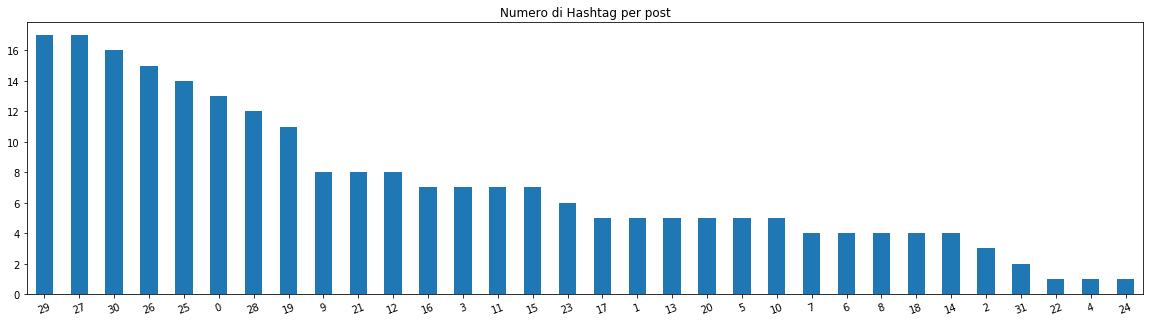

In [8]:


full['nr_hashtags'].value_counts().plot(kind='bar', 
                                       rot=20,
                                       title='Numero di Hashtag per post', 
                                       figsize=(20,5))

In [9]:
import seaborn as sns

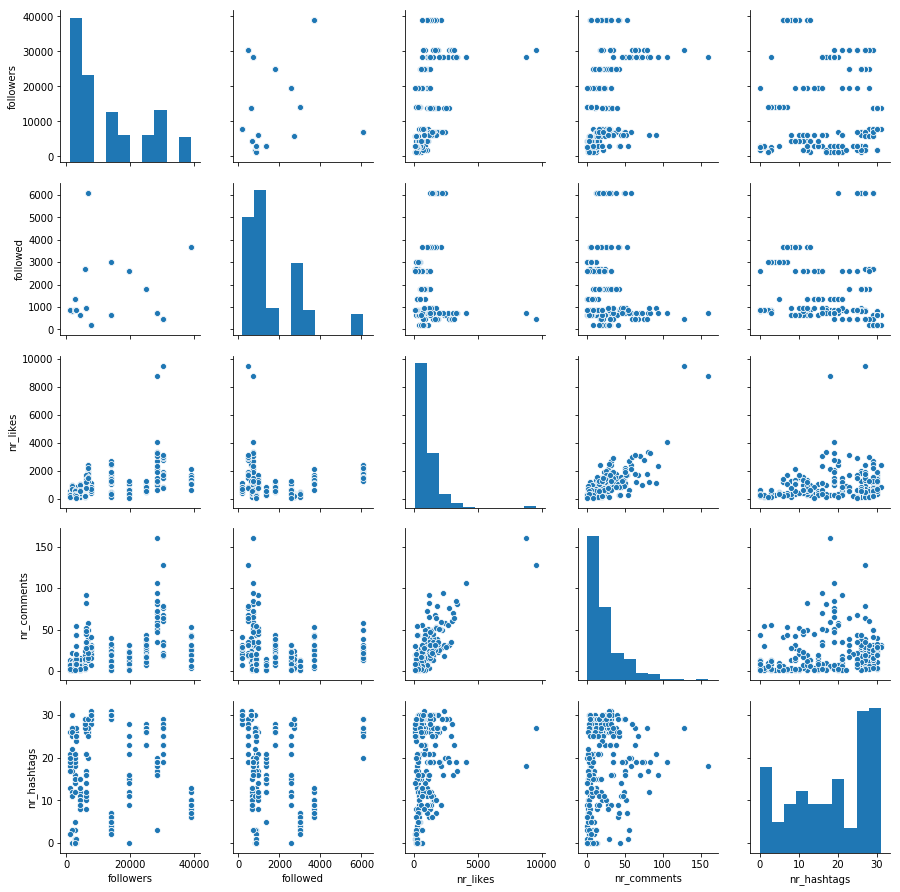

In [10]:
#Draw scatterplots for joint relationships and histograms for univariate distributions:
user=full[["followers", "followed", "nr_likes", 'nr_comments', 'nr_hashtags']]
sns.pairplot(user)

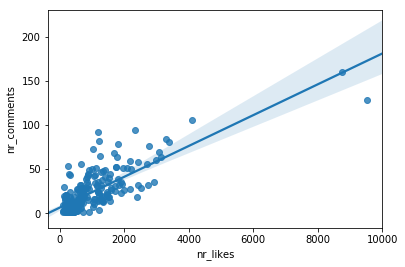

In [18]:
sns.regplot(x=user["nr_likes"], y=user["nr_comments"])

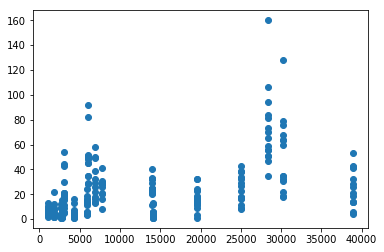

In [19]:
plt.scatter(user['followers'],user['nr_comments'])

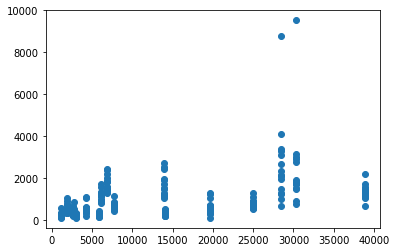

In [11]:
plt.scatter (user['followers'],user['nr_likes'])

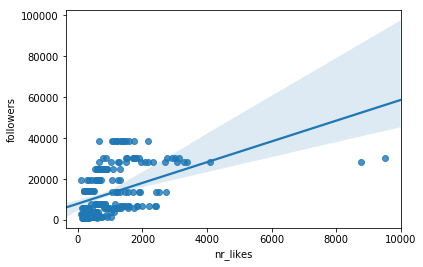

In [14]:
sns.regplot(x=full["nr_likes"], y=full["followers"])

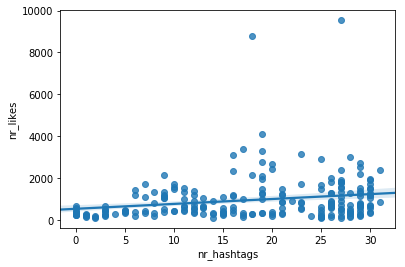

In [15]:
sns.regplot(x=full["nr_hashtags"], y=full["nr_likes"])

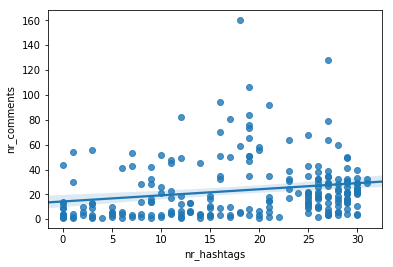

In [16]:
sns.regplot(x=full["nr_hashtags"], y=full["nr_comments"])

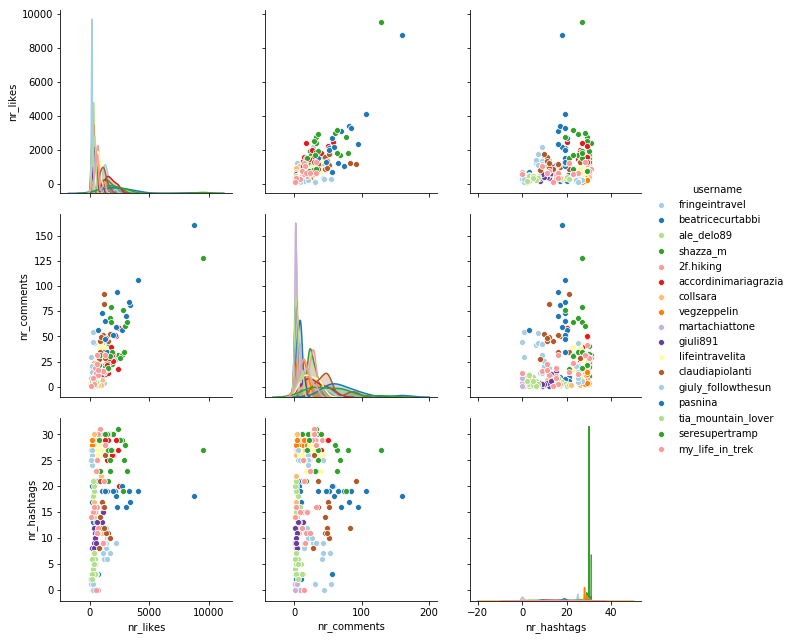

In [24]:
user_h=full[["nr_likes", 'nr_comments', 'nr_hashtags', 'username']]
g = sns.pairplot(user_h, height=3, hue="username", palette="Paired")

C:\Users\valen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\valen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


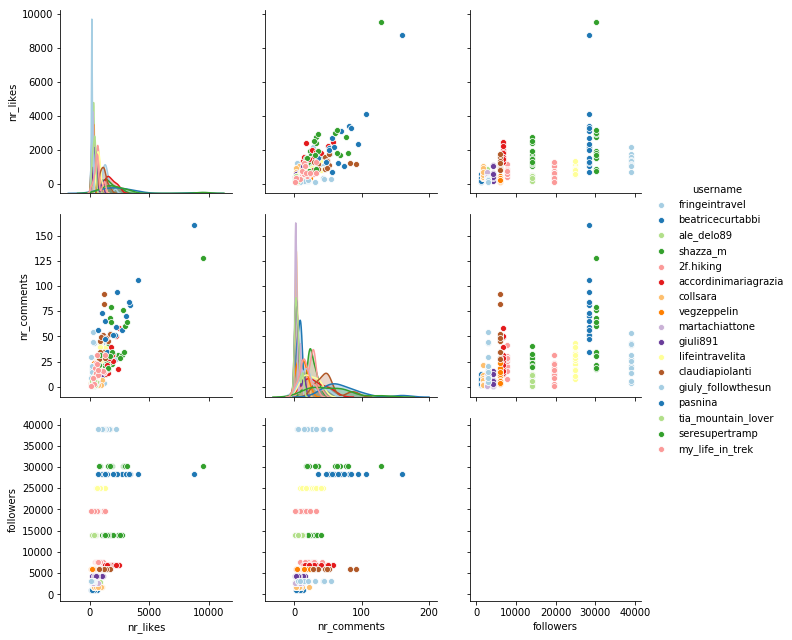

In [25]:
user_h=full[["nr_likes", 'nr_comments', 'followers', 'username']]
g = sns.pairplot(user_h, height=3, hue="username", palette="Paired")

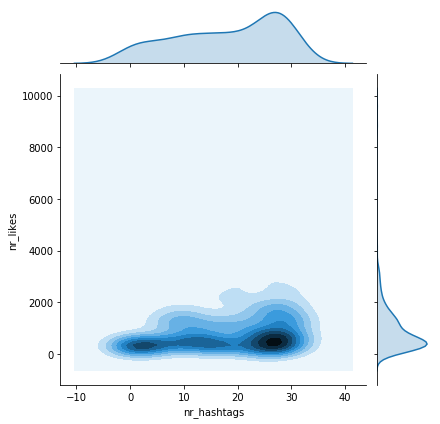

In [28]:
sns.jointplot(x="nr_hashtags", y="nr_likes", data=full, kind="kde");

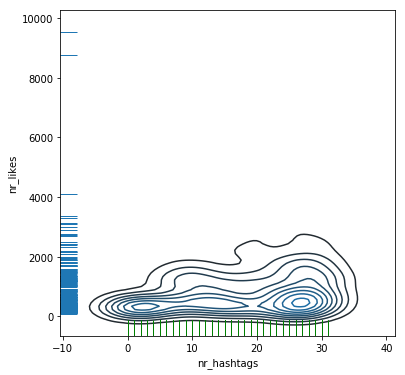

In [30]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(full.nr_hashtags, full.nr_likes, ax=ax)
sns.rugplot(full.nr_hashtags, color="g", ax=ax)
sns.rugplot(full.nr_likes, vertical=True, ax=ax);

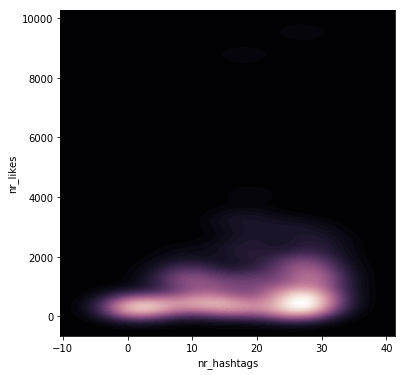

In [32]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(full.nr_hashtags, full.nr_likes, cmap=cmap, n_levels=60, shade=True);

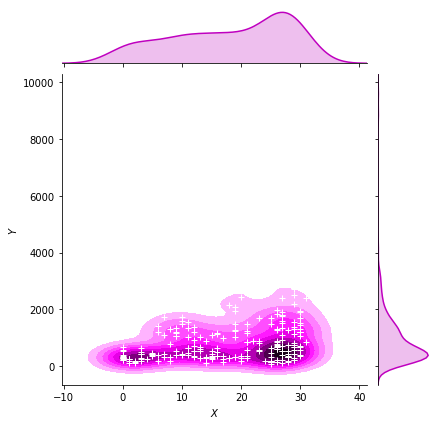

In [17]:
g = sns.jointplot(x="nr_hashtags", y="nr_likes", data=full, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

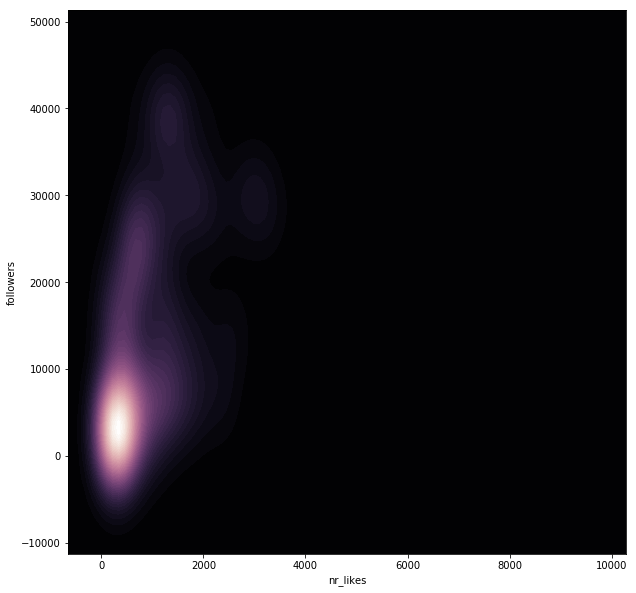

In [19]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(full.nr_likes, full.followers, cmap=cmap, n_levels=60, shade=True);

In [166]:
user_date=full[["nr_likes", 'nr_comments', 'year_month_day_p', 'year-month-day_c', 'username', 'followers']]

In [159]:
!pip install plotly 
!pip install cufflinks

  Stored in directory: C:\Users\valen\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
  Stored in directory: C:\Users\valen\AppData\Local\pip\Cache\wheels\8d\5a\6f\c97d47dc901071611809eb61aaa477d50a60692dc764dca622
Successfully built cufflinks


In [35]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

import cufflinks as cf 
init_notebook_mode(connected=True) 
cf.go_offline()

In [36]:
full['year_month_day_p'].iplot(kind='hist',xTitle='Data pubblicazione post', 
                                    yTitle='Frequenza', title='Data dei post analizzati')

In [167]:
#user_date[['year_month_day_p', 'year-month-day_c']].iplot(kind='hist')

In [37]:
full['nr_likes'].iplot(kind='box',xTitle='nr_likes', title='Likes')

In [38]:
full.iplot(kind='scatter',x='nr_comments',
y='nr_likes',mode='markers',size=6)

In [63]:
full.iplot(x='username',y='nr_comments',mode='markers',title='Commenti per user per post')

In [65]:
full.iplot(x='username',y='year_month_day_p',mode='markers', title='Mesi di pubblicazione dei post')

In [66]:
full.iplot(x='username',y='nr_likes',mode='markers', title='Likes per user per post')

In [50]:
full.iplot(x='nr_hashtags',y='nr_likes',mode='markers')

In [52]:
median_likes=full.loc[:,"nr_likes"].median()
print(median_likes)

640.0


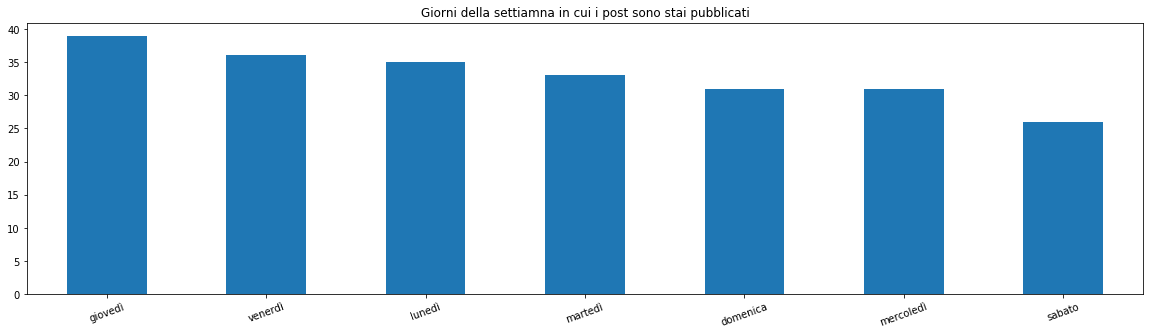

In [62]:
full['day_of_week_p'].value_counts().plot(kind='bar', 
                                       rot=20,
                                       title='Giorni della settiamna in cui i post sono stai pubblicati', 
                                       figsize=(20,5))

In [72]:
import plotly.graph_objs as go

iplot([go.Histogram2dContour(x=full['day_of_week_p'], y=full['nr_likes'], contours=dict(coloring='heatmap')),
       go.Scatter(x=full['day_of_week_p'], y=full['nr_likes'], mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)

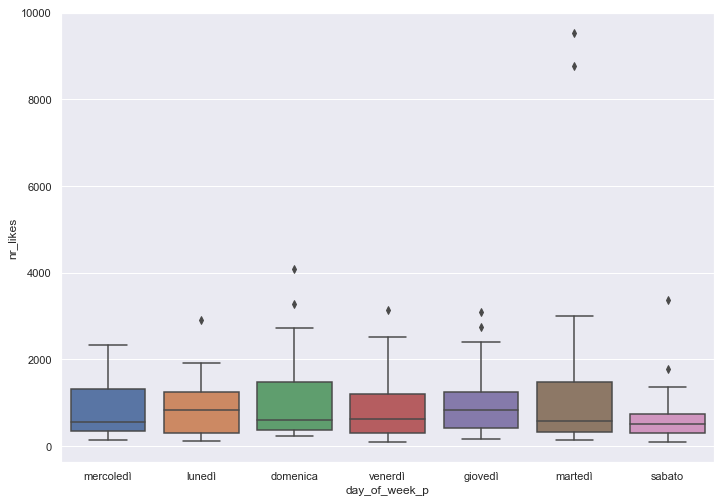

In [99]:
 sns.boxplot( x=full["day_of_week_p"], y=full["nr_likes"])


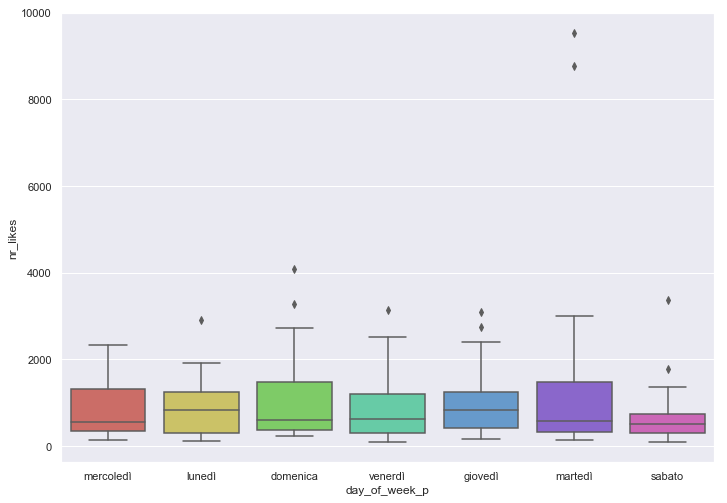

In [122]:
sns.boxplot( x=full["day_of_week_p"], y=full["nr_likes"], palette="hls")


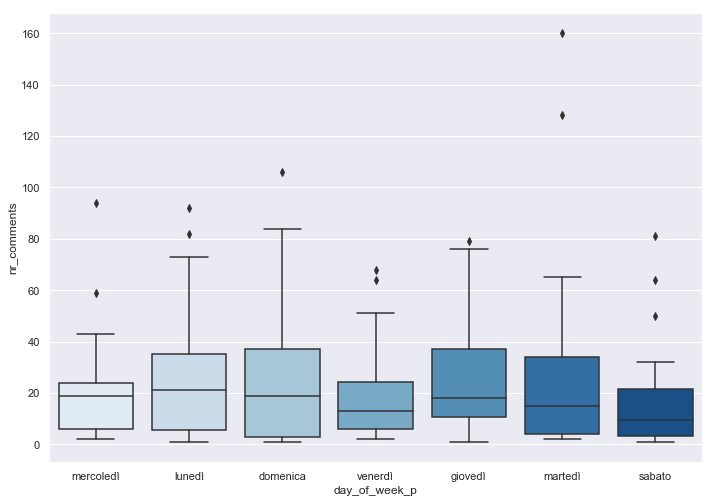

In [115]:
sns.boxplot( x=full["day_of_week_p"], y=full["nr_comments"], palette="Blues")

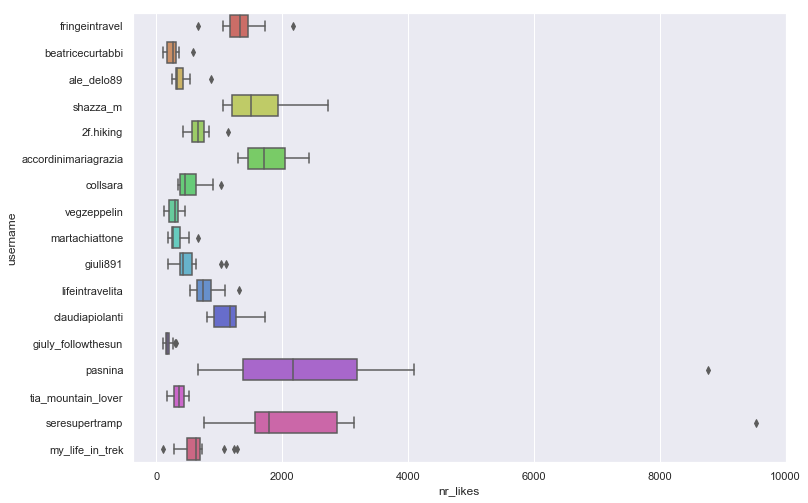

In [124]:
sns.boxplot( x=full["nr_likes"], y=full["username"], palette="hls")

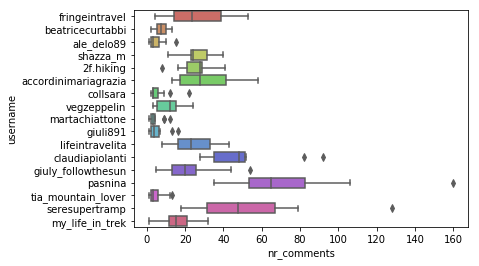

In [20]:
sns.boxplot( x=full["nr_comments"], y=full["username"], palette="hls")